In [7]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [1]:
iris = datasets.load_iris()
print(iris.keys());
print(iris.DESCR);

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1

In [2]:
X = iris["data"][:, 2:3]  # petal width
y = (iris["target"] == 0).astype(np.int)  # 1 if Iris-setosa, else 0

In [4]:
log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
X_new = np.linspace(0, 8, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

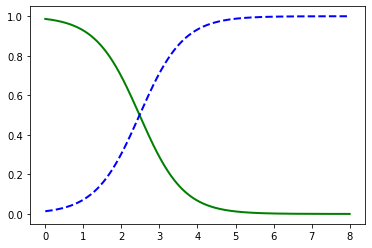

In [8]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-setosa")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-setosa")
plt.show()

In [9]:
X_new = np.linspace(0, 8, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 0:1] >= 0.5][0]

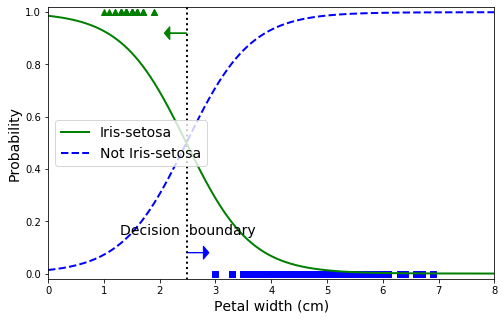

[[-1.72964826]]


In [10]:
plt.figure(figsize=(8, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-setosa")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-setosa")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, 0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, -0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 8, -0.02, 1.02])
plt.show()
print(log_reg.coef_)